In [1]:
 def set_plot_param():
    """Set my own customized plotting parameters"""
    mpl.rc('axes', edgecolor='grey')
    mpl.rc('axes', labelcolor='black')
    mpl.rc('xtick', color='black')
    mpl.rc('xtick', labelsize=12)
    mpl.rc('ytick', color='black')
    mpl.rc('ytick', labelsize=12)
    mpl.rc('axes', titlesize=18)
    mpl.rc('axes', labelsize=12)
    mpl.rc('legend', fontsize='large')
    mpl.rc('text', color='black')

In [2]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals","Bird","Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    

    
    for taxa in taxas:
        # Initialize taxa-level lists
        dataarrays_sdms_newvalue_hist = []
        dataarrays_sdms_newvalue_fut = []
        dataarrays_sdms_sumbin_hist = []
        dataarrays_sdms_sumbin_fut = []
        mean_newvalue_hist[scenario][taxa] = {}
        mean_newvalue_fut[scenario][taxa] = {}
        mean_sumbin_hist[scenario][taxa] = {}
        mean_sumbin_fut[scenario][taxa] = {}
        
        mean_over_sdms_gcms_hist[scenario][taxa] = {}
        mean_over_sdms_gcms_fut[scenario][taxa] = {}
        mean_over_sdms_gcms_sumbin_hist[scenario][taxa] = {}
        mean_over_sdms_gcms_sumbin_fut[scenario][taxa] = {}

        mean_over_all_sdms_gcms_hist[scenario][taxa] = {}
        mean_over_all_sdms_gcms_fut[scenario][taxa] = {}
        mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa] = {}
        mean_over_all_sdms_gcms_sumbin_fut[scenario] [taxa]= {}

        for sdm in sdms:
            mean_newvalue_hist[scenario][taxa][sdm] = {}
            mean_newvalue_fut[scenario][taxa][sdm] = {}
            mean_sumbin_hist[scenario][taxa][sdm] = {}
            mean_sumbin_fut[scenario][taxa][sdm] = {}

            dataarrays_newvalue_hist = []
            dataarrays_newvalue_fut = []
            dataarrays_sumbin_hist = []
            dataarrays_sumbin_fut = []

            for gcm in gcms:
                mean_newvalue_hist[scenario][taxa][sdm][gcm] = {}
                mean_newvalue_fut[scenario][taxa][sdm][gcm] = {}
                mean_sumbin_hist[scenario][taxa][sdm][gcm] = {}
                mean_sumbin_fut[scenario][taxa][sdm][gcm] = {}

                sum_newvalue_hist = None
                sum_newvalue_future = None
                sum_sumbin_hist = None
                sum_sumbin_future = None

                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal4.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                # Assign the summed values to your dictionary
                mean_newvalue_hist[scenario][taxa][sdm][gcm] = newvalue_hist_taxa
                mean_newvalue_fut[scenario][taxa][sdm][gcm] = newvalue_future_taxa
                mean_sumbin_hist[scenario][taxa][sdm][gcm] = sum_bin_hist_taxa
                mean_sumbin_fut[scenario][taxa][sdm][gcm] = sum_bin_future_taxa

                dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][taxa][sdm][gcm])
                dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][taxa][sdm][gcm])
                dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][taxa][sdm][gcm])
                dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][taxa][sdm][gcm])

            # Concatenate and calculate the mean over the new dimension
            mean_over_sdms_gcms_hist[scenario][taxa][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_fut[scenario][taxa][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_hist[scenario][taxa][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_fut[scenario][taxa][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

                   # Append the mean DataArrays across GCMs to the SDM lists
            dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][taxa][sdm])
            dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][taxa][sdm])
            dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][taxa][sdm])
            dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][taxa][sdm])

        # Concatenate and calculate the mean over SDMs
        mean_over_all_sdms_gcms_hist[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_fut[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 



FileNotFoundError: [Errno 2] No such file or directory: "/storage/scratch/users/ch21o450/data/intermediate_results/newvalue_hist_sum_GAM_GFDL-ESM2M_Mammals_['rcp26']_['65']_dispersal4.pkl"

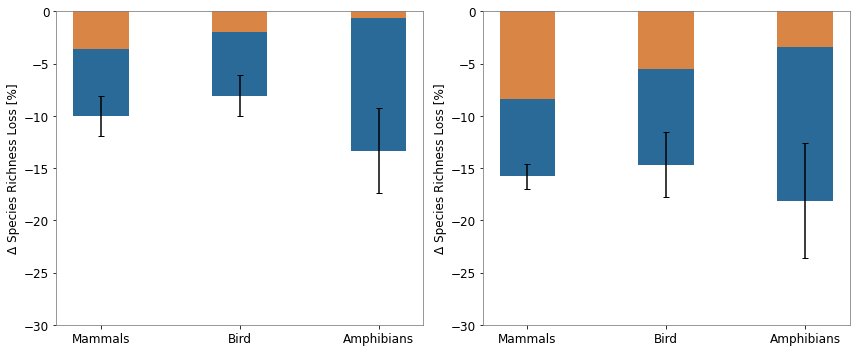

In [26]:


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4

x_positions = np.arange(len(taxas))
min_threshold=1e-6
for j, scenario in enumerate(scenarios):
    ax = axes[j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change<0)

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change<0)

        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()


        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change<0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)

        # Plotting with the specific standard deviation for this taxa
        ax.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')
    
    ax.set_ylim([-30, 0])
    ax.set_xticks(x_positions)
    ax.set_xticklabels(taxas)
    ax.set_ylabel('Δ Species Richness Loss [%]')
    #ax.set_title(f'Weighted Mean Change from Historical to {year_indices[time_ind]} {scenario}')
   # if j == 0:  # Add legend only to the first subplot
    #    ax.legend(frameon=False, loc='lower center')

plt.tight_layout()
plt.show()

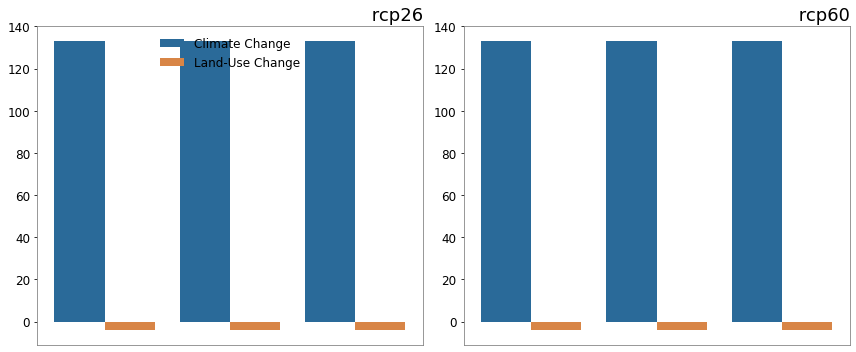

In [171]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
set_plot_param()  # Assuming this sets plot parameters
x_positions = np.arange(len(taxas))
min_threshold = 1e-6

for j, scenario in enumerate(scenarios):
    ax = axes[j]
    std_dev_newvalue = []

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]

        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

        EARTH_RADIUS = 6371000  # Earth's radius in meters
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))  # Latitudinal difference in radians
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))  # Longitudinal difference in radians

        # Calculate grid cell area
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))

        # Calculate the absolute change
        cc_change = newvalue_future - newvalue_hist
        luc_change = sumbin_future - sumbin_hist


        # Calculate total change for each category (no filtering)
        total_change_cc = xr.where(cc_change, cell_area, 0).sum().item()/ 1e12
      
        
        total_change_luc = np.sum(luc_change * cell_area).item() / 1e12
        otal_change_cc = xr.where(cc_change, cell_area, 0).sum().item()/ 1e12

        # Plotting
        ax.bar(x_shift, total_change_cc, bar_width, label='Climate Change' if i == 0 else "", color=color_change)
        ax.bar(x_shift + bar_width, total_change_luc, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)

   # ax.set_ylim([0, 30])
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.set_title(f' {scenario}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()

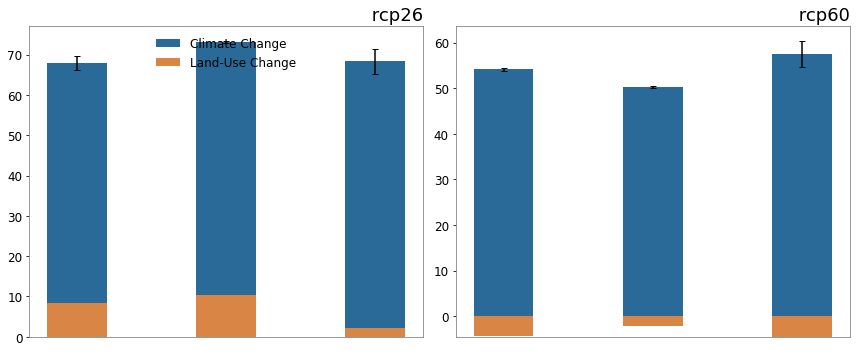

In [181]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
set_plot_param()
x_positions = np.arange(len(taxas))
min_threshold=1e-6
for j, scenario in enumerate(scenarios):
    ax = axes[j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))  # Latitudinal difference in radians
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))  # Longitudinal difference in radians

        # Calculate grid cell area
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) 


        climate_change = difference.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change>0)
        
        gain_area_cc = xr.where(climate_change > 0, cell_area, 0).sum().item()/ 1e12

        rel_diff_newvalue_mean = gain_area_cc

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) 


        
        
        climate_land_change = difference.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change>0)

        gain_area_luc = xr.where(climate_land_change > 0, cell_area, 0).sum().item()/ 1e12
        
        luc = gain_area_luc - gain_area_cc
        rel_diff_sumbin = luc
        

        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change>0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)

        # Plotting with the specific standard deviation for this taxa
        ax.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')

   # ax.set_ylim([0, 30])
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.set_title(f' {scenario}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()

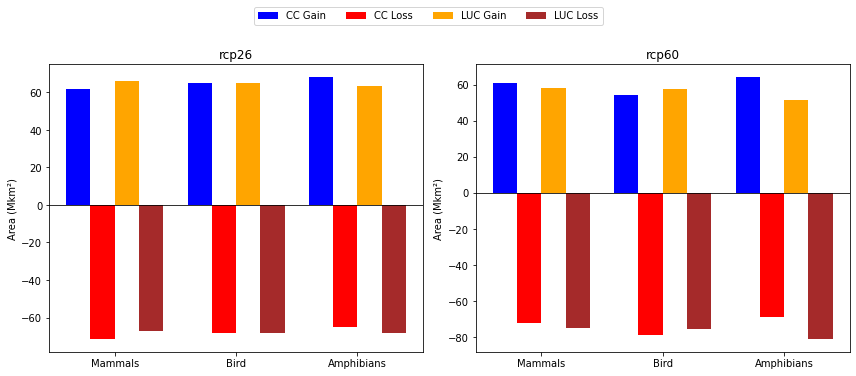

In [33]:

# Assuming 'scenarios' and 'taxas' are defined lists
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_gain = "#2a6a99"
color_loss = "#d88546"

bar_width = 0.2
# Placeholder for setting plot parameters, replace with your actual function
# set_plot_param()
x_positions = np.arange(len(taxas))
color_gain_cc = "#2a6a99"
color_loss_cc = "#c44e52"
color_gain_luc = "#d88546"
color_loss_luc = "#8172b2"

for j, scenario in enumerate(scenarios):
    ax = axes[j]
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
                
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]
        # Simulate retrieving your data
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12
        
        # Example calculation, adjust according to your actual logic for gains and losses
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        
        diff_fut = sumbin_future - newvalue_future
        diff_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(diff_fut > diff_hist, cell_area, 0).sum().item()   
        loss_area_luc = xr.where(diff_fut<diff_hist, cell_area, 0).sum().item()
        
        loss_area_luc = xr.where(sumbin_future-newvalue_future < sumbin_hist-newvalue_hist, cell_area, 0).sum().item() 
        no_change_area_luc = xr.where(sumbin_future == sumbin_hist, cell_area, 0).sum().item()
        


        ax.bar(x_shift - 1.5 * bar_width, gain_area_cc, bar_width, label='CC Gain' if i == 0 and j == 0 else "", color='blue')
        # Plot Climate Change Loss
        ax.bar(x_shift - 0.5 * bar_width, -loss_area_cc, bar_width, label='CC Loss' if i == 0 and j == 0 else "", color='red')
        # Plot Land-Use Change Gain
        ax.bar(x_shift + 0.5 * bar_width, gain_area_luc, bar_width, label='LUC Gain' if i == 0 and j == 0 else "", color='orange')
        # Plot Land-Use Change Loss
        ax.bar(x_shift + 1.5 * bar_width, -loss_area_luc, bar_width, label='LUC Loss' if i == 0 and j == 0 else "", color='brown')

    # Set the title and labels
    ax.set_title(scenario)
    ax.set_ylabel('Area (Mkm²)')
    ax.set_xticks(x_positions)
    ax.set_xticklabels(taxas)
    ax.axhline(0, color='black', linewidth=0.8)  # Add a line for y=0

# Add an overall legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

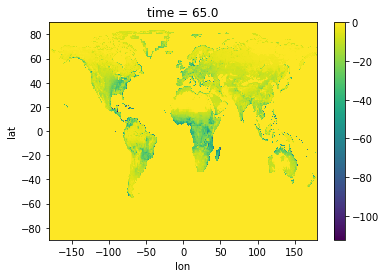

In [24]:
diff_fut.plot()

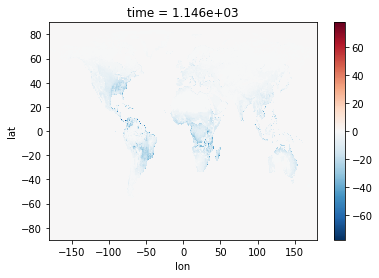

In [6]:
diff_hist.plot()

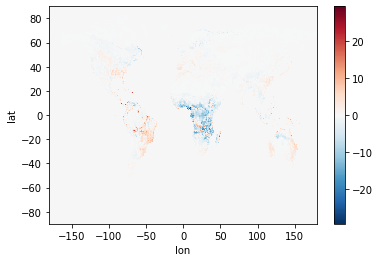

In [7]:
diff = diff_fut-diff_hist
diff.plot()

In [12]:
gain_area_luc = xr.where(diff_fut > diff_hist, cell_area, 0).sum()
gain_area_luc.item()

51.63145481452567

In [79]:
gain_area_cc/total_area

2.901879240766663e-05

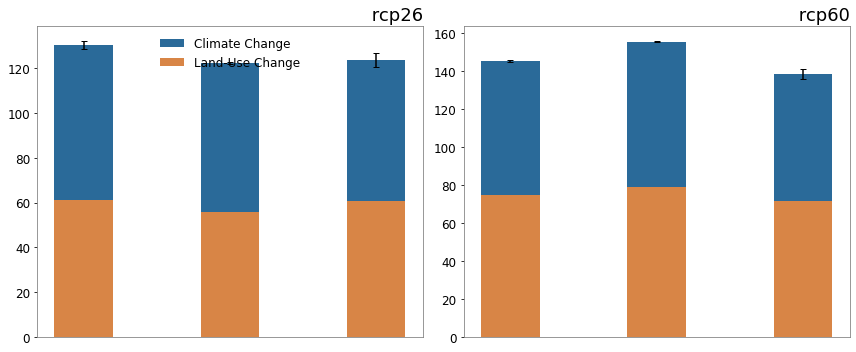

In [117]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
set_plot_param()
x_positions = np.arange(len(taxas))
min_threshold=1e-6
for j, scenario in enumerate(scenarios):
    ax = axes[j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))  # Latitudinal difference in radians
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))  # Longitudinal difference in radians

        # Calculate grid cell area
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) 

        
        climate_change = difference.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change<0)
        
        loss_area_cc = xr.where(climate_change < 0, cell_area, 0).sum().item()/ 1e12
        

        rel_diff_newvalue_mean = loss_area_cc

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered)


        climate_land_change = difference.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change<0)
        
        loss_area_luc = xr.where(climate_land_change < 0, cell_area, 0).sum().item()/ 1e12
        
        luc = loss_area_luc - loss_area_cc
        rel_diff_sumbin = loss_area_luc
        

        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change>0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)

        # Plotting with the specific standard deviation for this taxa
        ax.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')

   # ax.set_ylim([0, 30])
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylabel('')
    ax.set_title(f' {scenario}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()

In [91]:
A# Plot for gain
for j, scenario in enumerate(scenarios):

    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        

        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))  # Latitudinal difference in radians
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))  # Longitudinal difference in radians

        # Calculate grid cell area
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change>0)
        
        gain_area_cc = xr.where(climate_change > 0, cell_area, 0).sum().item()/ 1e12

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change>0)

        gain_area_luc = xr.where(climate_land_change > 0, cell_area, 0).sum().item()/ 1e12
        
        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()
        
        print(f"Scenario: {scenario}, Taxa: {taxa},  Gain Area CC: {gain_area_cc:.2f} km²")    
        print(f"Scenario: {scenario}, Taxa: {taxa},  Gain Area LUC: {gain_area_luc:.2f} km²") 

  

Scenario: rcp26, Taxa: Mammals,  Gain Area CC: 59.65 km²
Scenario: rcp26, Taxa: Mammals,  Gain Area LUC: 67.41 km²
Scenario: rcp26, Taxa: Bird,  Gain Area CC: 62.66 km²
Scenario: rcp26, Taxa: Bird,  Gain Area LUC: 72.87 km²
Scenario: rcp26, Taxa: Amphibians,  Gain Area CC: 65.35 km²
Scenario: rcp26, Taxa: Amphibians,  Gain Area LUC: 67.24 km²
Scenario: rcp60, Taxa: Mammals,  Gain Area CC: 58.48 km²
Scenario: rcp60, Taxa: Mammals,  Gain Area LUC: 54.01 km²
Scenario: rcp60, Taxa: Bird,  Gain Area CC: 52.28 km²
Scenario: rcp60, Taxa: Bird,  Gain Area LUC: 50.21 km²
Scenario: rcp60, Taxa: Amphibians,  Gain Area CC: 58.80 km²
Scenario: rcp60, Taxa: Amphibians,  Gain Area LUC: 54.15 km²


In [93]:
 gain_area_cc 

58.800859459404144

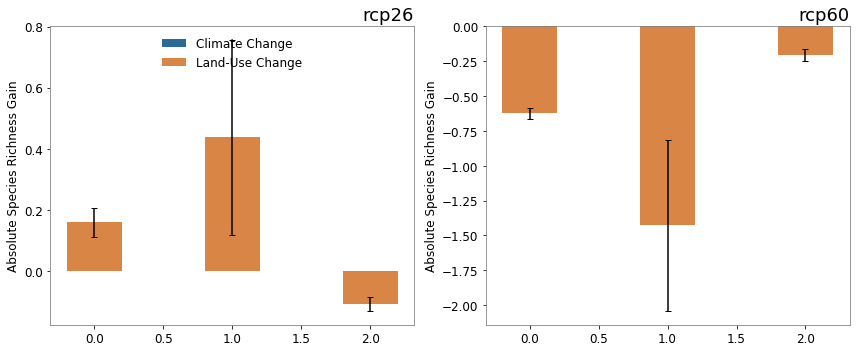

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
x_positions = np.arange(len(taxas))
for j, scenario in enumerate(scenarios):
    ax = axes[j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

        # Calculate the absolute difference
        # Assuming newvalue_future is your DataArray
        # Earth's radius in meters
        EARTH_RADIUS = 6371000
        lat_diff = np.radians(np.abs(newvalue_future.lat.diff('lat')))
        lon_diff = np.radians(np.abs(newvalue_future.lon.diff('lon')))
        lon_diff = lon_diff.mean().item()  # Assuming a regular grid, so one value applies globally
        cell_area = (EARTH_RADIUS ** 2) * lon_diff * np.cos(np.radians(newvalue_future.lat)) * lat_diff
        cell_area = cell_area.broadcast_like(newvalue_future)
        land_area_fut = (newvalue_future * cell_area)/1e12

        lat_diff = np.radians(np.abs(newvalue_hist.lat.diff('lat')))
        lon_diff = np.radians(np.abs(newvalue_hist.lon.diff('lon')))
        lon_diff = lon_diff.mean().item()  # Assuming a regular grid, so one value applies globally
        cell_area = (EARTH_RADIUS ** 2) * lon_diff * np.cos(np.radians(newvalue_hist.lat)) * lat_diff
        cell_area = cell_area.broadcast_like(newvalue_hist)
        land_area_hist = (newvalue_hist * cell_area)/1e12

        abs_diff_newvalue = land_area_fut - land_area_hist

        
        
        lat_diff = np.radians(np.abs(sumbin_future.lat.diff('lat')))
        lon_diff = np.radians(np.abs(sumbin_future.lon.diff('lon')))
        lon_diff = lon_diff.mean().item()  # Assuming a regular grid, so one value applies globally
        cell_area = (EARTH_RADIUS ** 2) * lon_diff * np.cos(np.radians(sumbin_future.lat)) * lat_diff
        cell_area = cell_area.broadcast_like(sumbin_future)
        land_area_fut = (sumbin_future * cell_area)/1e12

        lat_diff = np.radians(np.abs(sumbin_hist.lat.diff('lat')))
        lon_diff = np.radians(np.abs(sumbin_hist.lon.diff('lon')))
        lon_diff = lon_diff.mean().item()  # Assuming a regular grid, so one value applies globally
        cell_area = (EARTH_RADIUS ** 2) * lon_diff * np.cos(np.radians(sumbin_hist.lat)) * lat_diff
        cell_area = cell_area.broadcast_like(sumbin_hist)
        land_area_hist = (sumbin_hist * cell_area)/1e12

        abs_diff_sumbin = sumbin_future - sumbin_hist

        abs_diff_newvalue_mean= abs_diff_newvalue.mean()
        luf = abs_diff_sumbin -abs_diff_newvalue 
        abs_diff_sumbin_mean = luf.mean()

        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm]
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]
                abs_difference = sep_future - sep_hist

                mean_abs_difference = abs_difference.mean()
                means_for_std.append(mean_abs_difference)

            mean_over_gcms = np.mean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        
        std_dev_newvalue_region = np.std(means_over_sdms)

        # Plotting the absolute difference with standard deviation for this taxa
        ax.bar(x_shift, abs_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=abs_diff_sumbin_mean)
        ax.bar(x_shift, abs_diff_sumbin_mean, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax.errorbar(x_shift, abs_diff_sumbin_mean + abs_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')

    ax.set_ylabel('Absolute Species Richness Gain')
    ax.set_title(f'{scenario}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()


In [59]:
abs_diff_sumbin

<xarray.DataArray (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75

<xarray.DataArray ()>
array(-0.00834241)

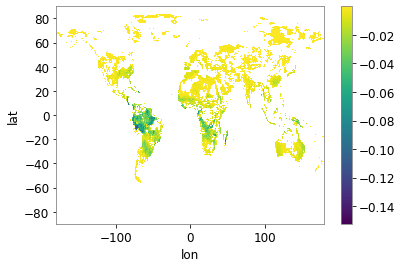

In [47]:
diff_land = (land_area_fut - land_area_hist)

diff_land = abs_diff_newvalue.where(abs_diff_newvalue<0)
diff_land.plot()
diff_land.mean()


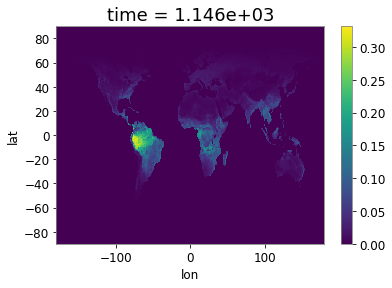

In [6]:
land_area_hist.plot()

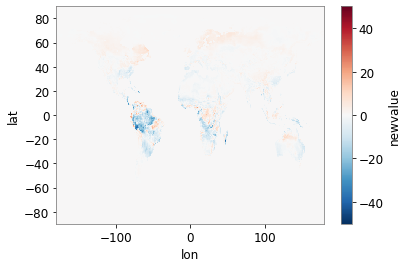

In [8]:
abs_diff =newvalue_future-newvalue_hist
abs_diff.plot()



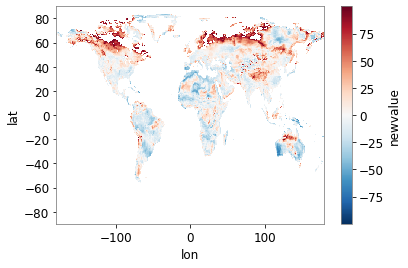

In [9]:
difference = (mean_over_all_sdms_gcms_fut[scenario]["Amphibians"] - mean_over_all_sdms_gcms_hist[scenario]["Amphibians"]) / mean_over_all_sdms_gcms_hist[scenario]["Amphibians"] * 100
climate_change = difference.where((difference >= -100) & (difference <= 100))

climate_change.plot()

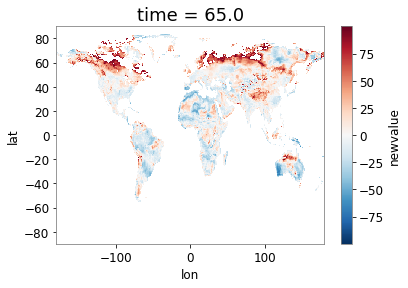

In [10]:
climate_change = climate_change.where(non_zero_mask, np.nan)

climate_change.plot()

In [11]:
climate_change_gain = climate_change.where(climate_change>0)
climate_change_loss = climate_change.where(climate_change<0)

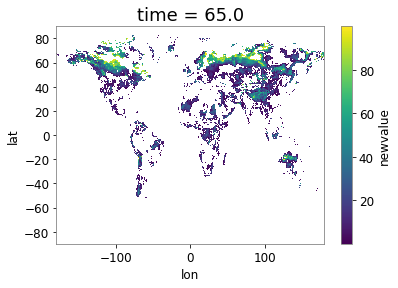

In [12]:
climate_change_gain.plot()


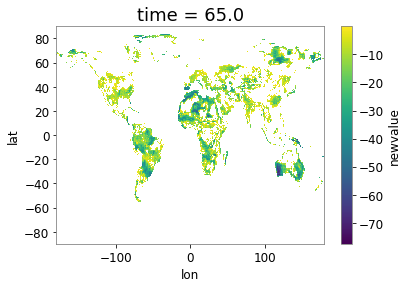

In [13]:
climate_change_loss.plot()

In [16]:
rel_diff_newvalue_mean = climate_change_gain.mean()
rel_diff_newvalue_mean

<xarray.DataArray 'newvalue' ()>
array(5.54869663)

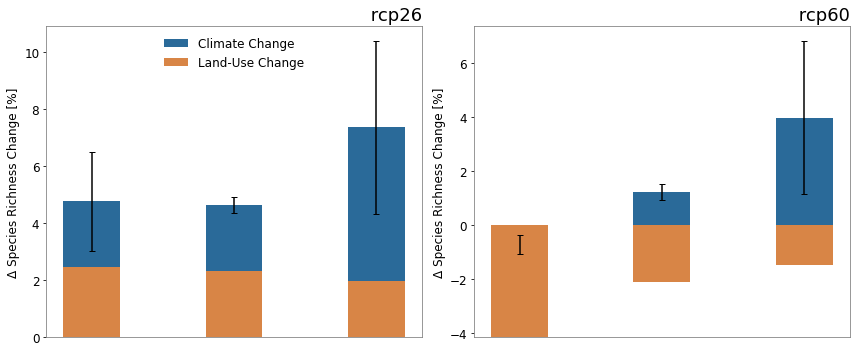

In [5]:


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
set_plot_param()
x_positions = np.arange(len(taxas))
min_threshold=1e-6
for j, scenario in enumerate(scenarios):
    ax = axes[j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
       # climate_change = climate_change.where(climate_change>0)

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
       # climate_land_change = climate_land_change.where(climate_land_change>0)

        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()


        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change>0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)

        # Plotting with the specific standard deviation for this taxa
        ax.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')

    #ax.set_ylim([0, 30])
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylabel('Δ Species Richness Change [%]')
    ax.set_title(f' {scenario}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()

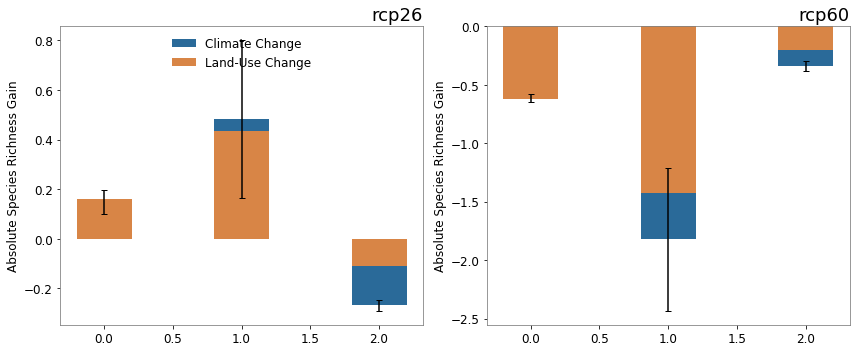

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
x_positions = np.arange(len(taxas))
for j, scenario in enumerate(scenarios):
    ax = axes[j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

        # Calculate the absolute difference
        abs_diff_newvalue = newvalue_future - newvalue_hist

        abs_diff_sumbin = sumbin_future - sumbin_hist

        abs_diff_newvalue_mean= abs_diff_newvalue.mean()
        abs_diff_sumbin_mean = abs_diff_sumbin.mean()

        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm]
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]
                abs_difference = sep_future - sep_hist

                mean_abs_difference = abs_difference.mean()
                means_for_std.append(mean_abs_difference)

            mean_over_gcms = np.mean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        
        std_dev_newvalue_region = np.std(means_over_sdms)

        # Plotting the absolute difference with standard deviation for this taxa
        ax.bar(x_shift, abs_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=abs_diff_sumbin_mean)
        ax.bar(x_shift, abs_diff_sumbin_mean, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax.errorbar(x_shift, abs_diff_sumbin_mean + abs_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')

    ax.set_ylabel('Absolute Species Richness Gain')
    ax.set_title(f'{scenario}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()


In [4]:
EARTH_RADIUS = 6371000  # Earth's radius in meters
LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))  # Latitudinal difference in radians
LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))  # Longitudinal difference in radians


cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))


In [22]:
import numpy as np
import xarray as xr

# Assuming newvalue_future is your DataArray
# Earth's radius in meters
EARTH_RADIUS = 6371000

# Convert latitude and longitude differences to radian
lat_diff = np.radians(np.abs(newvalue_future.lat.diff('lat')))
lon_diff = np.radians(np.abs(newvalue_future.lon.diff('lon')))

# Longitude difference is constant across all cells; we assume global coverage and regular grid
lon_diff = lon_diff.mean().item()  # Assuming a regular grid, so one value applies globally

# Calculate the area for each latitude
cell_area = (EARTH_RADIUS ** 2) * lon_diff * np.cos(np.radians(newvalue_future.lat)) * lat_diff

# Adjust the shape of cell_area to match newvalue_future for broadcasting
cell_area = cell_area.broadcast_like(newvalue_future)

# Multiply the probabilities by the area to get the land area for each grid cell
land_area_fut = (newvalue_future * cell_area)/1e12

# To get total land area represented by the data array, sum over all grid cells
#total_land_area = land_area.sum(dim=['lat', 'lon'])



In [23]:
import numpy as np
import xarray as xr

# Assuming newvalue_future is your DataArray
# Earth's radius in meters
EARTH_RADIUS = 6371000

# Convert latitude and longitude differences to radians
lat_diff = np.radians(np.abs(newvalue_hist.lat.diff('lat')))
lon_diff = np.radians(np.abs(newvalue_hist.lon.diff('lon')))

# Longitude difference is constant across all cells; we assume global coverage and regular grid
lon_diff = lon_diff.mean().item()  # Assuming a regular grid, so one value applies globally

# Calculate the area for each latitude
cell_area = (EARTH_RADIUS ** 2) * lon_diff * np.cos(np.radians(newvalue_hist.lat)) * lat_diff

# Adjust the shape of cell_area to match newvalue_future for broadcasting
cell_area = cell_area.broadcast_like(newvalue_hist)

# Multiply the probabilities by the area to get the land area for each grid cell
land_area_hist = (newvalue_hist * cell_area)/1e12

# To get total land area represented by the data array, sum over all grid cells
#total_land_area = land_area.sum(dim=['lat', 'lon'])




<xarray.DataArray ()>
array(inf)
Coordinates:
    time     float64 65.0

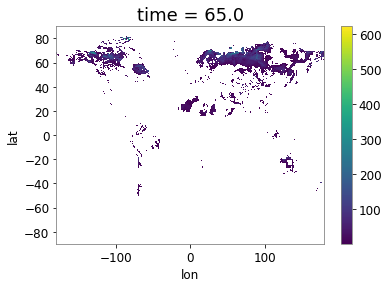

In [25]:
diff_land = ((land_area_future - land_area_hist) / land_area_hist) * 100

diff_land = diff_land.where(diff_land>0)
diff_land.plot()
diff_land.mean()


Scenario: rcp26, Taxa: Mammals,  Gain Area CC: 59.65 km²
Scenario: rcp26, Taxa: Mammals,  Gain Area LUC: 67.41 km²
Scenario: rcp26, Taxa: Bird,  Gain Area CC: 62.66 km²
Scenario: rcp26, Taxa: Bird,  Gain Area LUC: 72.87 km²
Scenario: rcp26, Taxa: Amphibians,  Gain Area CC: 65.35 km²
Scenario: rcp26, Taxa: Amphibians,  Gain Area LUC: 67.24 km²
Scenario: rcp60, Taxa: Mammals,  Gain Area CC: 58.48 km²
Scenario: rcp60, Taxa: Mammals,  Gain Area LUC: 54.01 km²
Scenario: rcp60, Taxa: Bird,  Gain Area CC: 52.28 km²
Scenario: rcp60, Taxa: Bird,  Gain Area LUC: 50.21 km²
Scenario: rcp60, Taxa: Amphibians,  Gain Area CC: 58.80 km²
Scenario: rcp60, Taxa: Amphibians,  Gain Area LUC: 54.15 km²


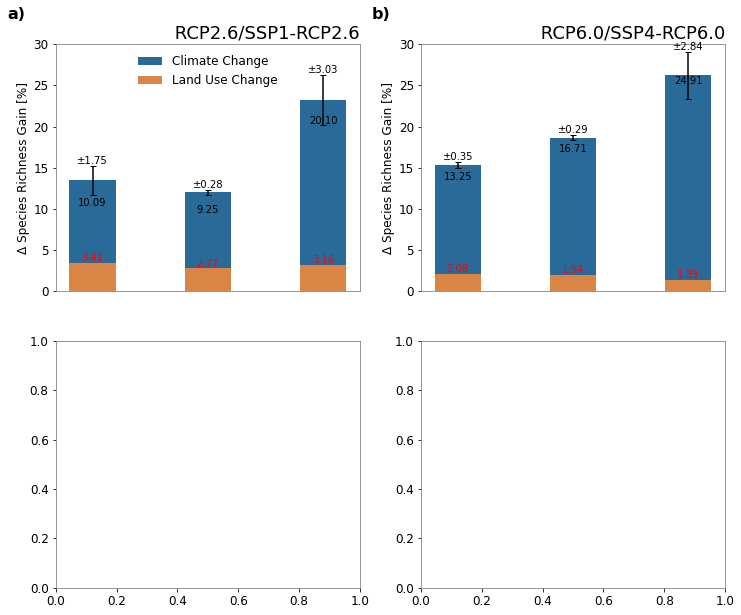

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots

# Set common parameters
bar_width = 0.4
x_positions = np.arange(len(taxas))
min_threshold = 1e-6
y_range_gain = [0, 30]
y_range_loss = [-30, 0]
subplot_labels = ['a)', 'b)','c)','d)']

scenario_indices={"rcp26": 'RCP2.6/SSP1-RCP2.6', "rcp60": 'RCP6.0/SSP4-RCP6.0'}
taxa_labels = ["Mammals", "Birds", "Amphibians"] 

# Plot for gain
for j, scenario in enumerate(scenarios):
    ax_gain = axes[0, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))  # Latitudinal difference in radians
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))  # Longitudinal difference in radians


        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change>0)
        
        gain_area_cc = xr.where(climate_change > 0, cell_area, 0).sum().item()/ 1e12

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change>0)

        gain_area_luc = xr.where(climate_land_change > 0, cell_area, 0).sum().item()/ 1e12
        
        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()
        
        print(f"Scenario: {scenario}, Taxa: {taxa},  Gain Area CC: {gain_area_cc:.2f} km²")    
        print(f"Scenario: {scenario}, Taxa: {taxa},  Gain Area LUC: {gain_area_luc:.2f} km²") 

        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change>0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)
        
        ax_gain.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax_gain.bar(x_shift, rel_diff_sumbin, bar_width, label='Land Use Change' if i == 0 else "", color=color_land_use_change)
        ax_gain.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')
        
        ax_gain.text(x_shift, rel_diff_newvalue_mean, f'{rel_diff_newvalue_mean:.2f}', ha='center', va='bottom')
        ax_gain.text(x_shift, rel_diff_sumbin, f'{rel_diff_sumbin:.2f}', ha='center', va='bottom',color='red')
        ax_gain.text(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean + std_dev_newvalue_region, f'±{std_dev_newvalue_region:.2f}', ha='center', va='bottom')

    
    ax_gain.set_ylim(y_range_gain)
    ax_gain.set_xticks([])
    ax_gain.set_xticklabels([])
    ax_gain.text(-0.1, 1.15, subplot_labels[j], transform=ax_gain.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    ax_gain.set_ylabel('Δ Species Richness Gain [%]')
    ax_gain.set_title(f' {scenario_indices[scenario]}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax_gain.legend(frameon=False, loc='upper center')




IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

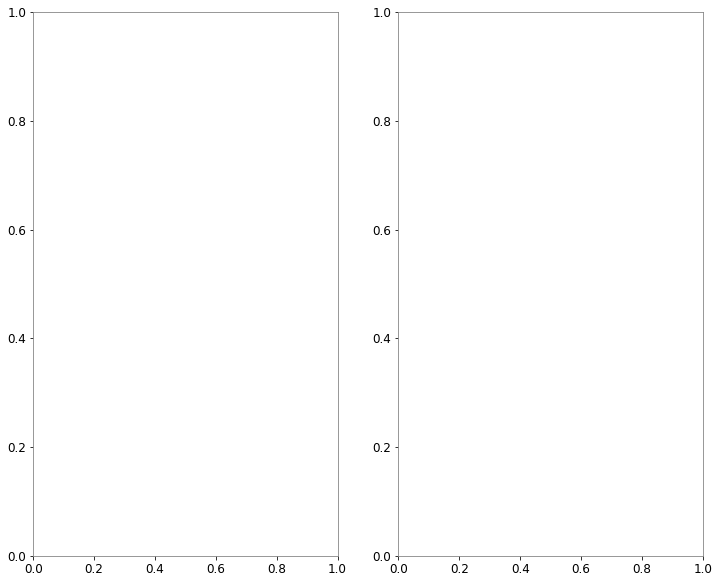

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr  # Assuming your data is in xarray format

fig, axes = plt.subplots(1, len(scenarios), figsize=(12, 10))  # Adjust subplot layout as needed
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
x_positions = np.arange(len(taxas))

for j, scenario in enumerate(scenarios):
    ax_gain = axes[0, j]  # Adjust if using a different axes layout
    ax_luc = axes[1, j]  # Separate axis for land use change if desired
    gain_area_cc_list = []
    gain_area_luc_list = []

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))  # Latitudinal difference in radians
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))  # Longitudinal difference in radians


        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = newvalue_future-newvalue_hist
        
        gain_area_cc = xr.where(climate_change , cell_area, 0).sum().item()/ 1e12

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))
        
        climate_land_change = sumbin_future-sumbin_hist

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)


        gain_area_luc = xr.where(climate_land_change, cell_area, 0).sum().item()/ 1e12
        gain_area_cc_list.append(gain_area_cc)
        gain_area_luc_list.append(gain_area_luc)

    # After processing all taxa for the scenario, plot the gain areas
    ax_gain.bar(x_positions - bar_width/2, gain_area_cc_list, bar_width, label='Climate Change', color=color_change)
    ax_luc.bar(x_positions + bar_width/2, gain_area_luc_list, bar_width, label='Land Use Change', color=color_land_use_change)

    ax_gain.set_title(f'{scenario} - Climate Change')
    ax_luc.set_title(f'{scenario} - Land Use Change')

    if j == 0:  # Only add legend to the first set of axes
        ax_gain.legend(loc='upper left')
        ax_luc.legend(loc='upper left')

axes[0, 0].set_ylabel('Gain Area (km²)')
axes[1, 0].set_ylabel('Gain Area (km²)')

plt.tight_layout()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

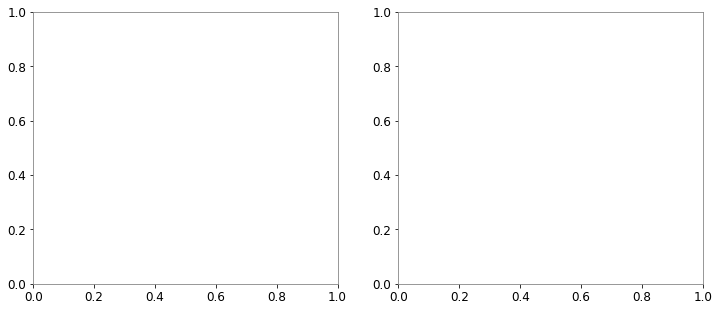

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr  # Assuming your data is in xarray format

fig, axes = plt.subplots(1, len(scenarios), figsize=(12, 5))  # Adjust subplot layout as needed
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.35  # Adjust width to fit two bars side by side
x_positions = np.arange(len(taxas))

for j, scenario in enumerate(scenarios):
    ax = axes[j] if len(scenarios) > 1 else axes  # Correction for single scenario case
    gain_area_cc_list = []
    gain_area_luc_list = []

    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        # Your data processing and calculation here
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))  # Latitudinal difference in radians
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))  # Longitudinal difference in radians


        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = newvalue_future-newvalue_hist
        
        gain_area_cc = xr.where(climate_change , cell_area, 0).sum().item()/ 1e12

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))
        
        climate_land_change = sumbin_future-sumbin_hist

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)


        gain_area_luc = xr.where(climate_land_change, cell_area, 0).sum().item()/ 1e12
        gain_area_cc_list.append(gain_area_cc)
        gain_area_luc_list.append(gain_area_luc)
        # Append calculated areas for climate change and land use change
        gain_area_cc_list.append(gain_area_cc)
        gain_area_luc_list.append(gain_area_luc)

    # Adjust x_positions for stacking bars side by side
    cc_positions = [x - bar_width / 2 for x in x_positions]
    luc_positions = [x + bar_width / 2 for x in x_positions]

    # Plotting gain areas for climate change and land use change side by side per taxa
    ax.bar(cc_positions, gain_area_cc_list, bar_width, label='Climate Change', color=color_change)
    ax.bar(luc_positions, gain_area_luc_list, bar_width, label='Land Use Change', color=color_land_use_change)

    ax.set_title(f'Scenario: {scenario}')
    ax.set_xticks(x_positions)  # Set x-ticks to the middle of the pairs
    ax.set_xticklabels(taxas, rotation=45)  # Assuming 'taxas' is a list of taxa names

    if j == 0:  # Add legend only to the first plot for clarity
        ax.legend(loc='upper left')

ax.set_ylabel('Gain Area (km²)')
plt.tight_layout()
plt.show()


In [64]:
gain_area_cc_list

[133.0944498336704,
 133.0944498336704,
 133.14014219819984,
 133.14014219819984,
 133.06145662781114,
 133.06145662781114]

In [66]:
cc_positions 

[-0.175, 0.825, 1.825]

In [65]:
gain_area_luc_list

[510.06609039800156,
 510.06609039800156,
 510.06609039800156,
 510.06609039800156,
 510.06609039800156,
 510.06609039800156]

In [49]:

# Set common parameters
bar_width = 0.4
x_positions = np.arange(len(taxas))
min_threshold = 1e-6
y_range_gain = [0, 30]
y_range_loss = [-30, 0]
subplot_labels = ['a)', 'b)','c)','d)']

scenario_indices={"rcp26": 'RCP2.6/SSP1-RCP2.6', "rcp60": 'RCP6.0/SSP4-RCP6.0'}
taxa_labels = ["Mammals", "Birds", "Amphibians"] 

# Plot for gain
for j, scenario in enumerate(scenarios):
    ax_gain = axes[0, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change>0)
        
        gain_area_cc = xr.where(climate_change > 0, cell_area, 0).sum().item()/ 1e12

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change>0)

        gain_area_luc = xr.where(climate_land_change > 0, cell_area, 0).sum().item()/ 1e12
        
        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()
        
        print(f"Scenario: {scenario}, Taxa: {taxa},  Gain Area CC: {gain_area_cc:.2f} km²")    
        print(f"Scenario: {scenario}, Taxa: {taxa},  Gain Area LUC: {gain_area_luc:.2f} km²") 

        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change>0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)
        
        ax_gain.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax_gain.bar(x_shift, rel_diff_sumbin, bar_width, label='Land Use Change' if i == 0 else "", color=color_land_use_change)
        ax_gain.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')
        
        ax_gain.text(x_shift, rel_diff_newvalue_mean, f'{rel_diff_newvalue_mean:.2f}', ha='center', va='bottom')
        ax_gain.text(x_shift, rel_diff_sumbin, f'{rel_diff_sumbin:.2f}', ha='center', va='bottom',color='red')
        ax_gain.text(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean + std_dev_newvalue_region, f'±{std_dev_newvalue_region:.2f}', ha='center', va='bottom')

    
    ax_gain.set_ylim(y_range_gain)
    ax_gain.set_xticks([])
    ax_gain.set_xticklabels([])
    ax_gain.text(-0.1, 1.15, subplot_labels[j], transform=ax_gain.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    ax_gain.set_ylabel('Δ Species Richness Gain [%]')
    ax_gain.set_title(f' {scenario_indices[scenario]}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax_gain.legend(frameon=False, loc='upper center')



Scenario: rcp26, Taxa: Mammals,  Gain Area CC: 59.65 km²
Scenario: rcp26, Taxa: Mammals,  Gain Area LUC: 67.41 km²
Scenario: rcp26, Taxa: Bird,  Gain Area CC: 62.66 km²
Scenario: rcp26, Taxa: Bird,  Gain Area LUC: 72.87 km²
Scenario: rcp26, Taxa: Amphibians,  Gain Area CC: 65.35 km²
Scenario: rcp26, Taxa: Amphibians,  Gain Area LUC: 67.24 km²
Scenario: rcp60, Taxa: Mammals,  Gain Area CC: 58.48 km²
Scenario: rcp60, Taxa: Mammals,  Gain Area LUC: 54.01 km²
Scenario: rcp60, Taxa: Bird,  Gain Area CC: 52.28 km²
Scenario: rcp60, Taxa: Bird,  Gain Area LUC: 50.21 km²
Scenario: rcp60, Taxa: Amphibians,  Gain Area CC: 58.80 km²
Scenario: rcp60, Taxa: Amphibians,  Gain Area LUC: 54.15 km²


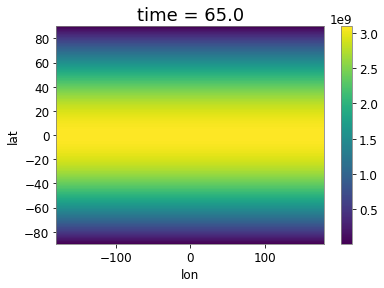

In [47]:
xr.where(climate_land_change, cell_area, 0).plot()

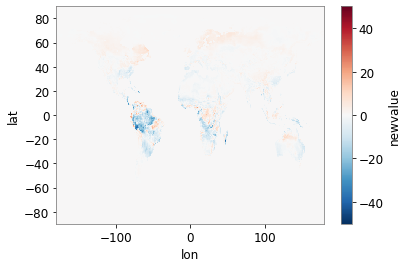

In [44]:
climate_change.plot()

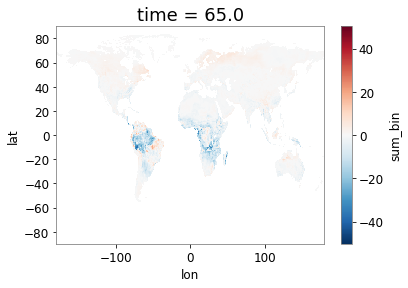

In [43]:
climate_land_change.plot()

In [45]:
gain_area_luc

510.06609039800156

In [32]:
total_land_area_change_future

<xarray.DataArray ()>
array(7.08425126e+11)

In [ ]:


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
set_plot_param()
x_positions = np.arange(len(taxas))
min_threshold=1e-6
for j, scenario in enumerate(scenarios):
    ax = axes[j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change>0)

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change>0)

        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()


        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change>0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)

        # Plotting with the specific standard deviation for this taxa
        ax.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')

    #ax.set_ylim([0, 30])
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylabel('Δ Species Richness Gain [%]')
    ax.set_title(f' {scenario}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()

In [ ]:
# Define thresholds
min_relative_change = 10  # Percent
min_absolute_change = 5  # Absolute change in species richness

# Calculate changes
absolute_change = newvalue_future - newvalue_hist
relative_change = (absolute_change / newvalue_hist_filtered) * 100

# Apply combined filters
significant_gain_mask = (relative_change >= min_relative_change) & (absolute_change >= min_absolute_change)
significant_loss_mask = (relative_change <= -min_relative_change) & (absolute_change <= -min_absolute_change)


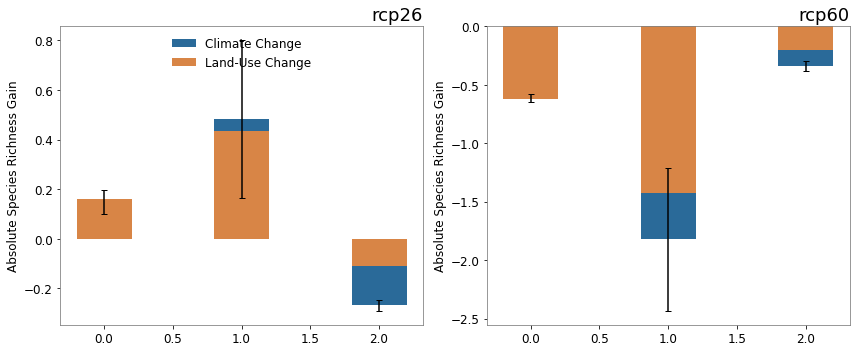

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4
x_positions = np.arange(len(taxas))
for j, scenario in enumerate(scenarios):
    ax = axes[j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

        # Calculate the absolute difference
        abs_diff_newvalue = newvalue_future - newvalue_hist
        abs_diff_sumbin = sumbin_future - sumbin_hist

        abs_diff_newvalue_mean = abs_diff_newvalue.mean()
        abs_diff_sumbin_mean = abs_diff_sumbin.mean()

        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm]
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]
                abs_difference = sep_future - sep_hist

                mean_abs_difference = abs_difference.mean()
                means_for_std.append(mean_abs_difference)

            mean_over_gcms = np.mean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        
        std_dev_newvalue_region = np.std(means_over_sdms)

        # Plotting the absolute difference with standard deviation for this taxa
        ax.bar(x_shift, abs_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=abs_diff_sumbin_mean)
        ax.bar(x_shift, abs_diff_sumbin_mean, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax.errorbar(x_shift, abs_diff_sumbin_mean + abs_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')

    ax.set_ylabel('Absolute Species Richness Gain')
    ax.set_title(f'{scenario}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax.legend(frameon=False, loc='upper center')

plt.tight_layout()
plt.show()


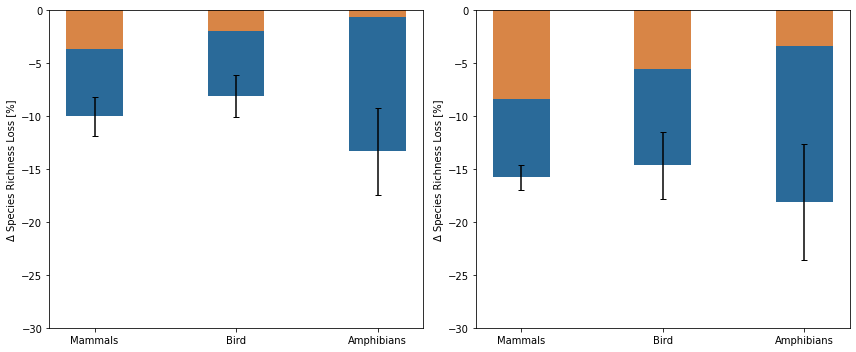

In [27]:
# relative loss in species richness globally 
import os
import pickle
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Displaying the created weights fo
# Specify the output directory
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

# List of taxa, SDMs, and GCMs
taxas = ["Mammals","Bird","Amphibians"]
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']

scenarios = ["rcp26", "rcp60"]  # Add rcp26 to the scenarios

time = '65'
time_ind=65
year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

mean_newvalue_hist= {}
mean_newvalue_fut = {}
mean_sumbin_hist = {}
mean_sumbin_fut = {}
    
mean_over_sdms_gcms_hist = {}
mean_over_sdms_gcms_fut = {}
mean_over_sdms_gcms_sumbin_hist = {}
mean_over_sdms_gcms_sumbin_fut = {}

mean_over_all_sdms_gcms_hist = {}
mean_over_all_sdms_gcms_fut = {}
mean_over_all_sdms_gcms_sumbin_hist = {}
mean_over_all_sdms_gcms_sumbin_fut = {}

for scenario in scenarios:
    mean_over_sdms_gcms_hist[scenario] = {}
    mean_over_sdms_gcms_fut[scenario] = {}
    mean_over_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_over_all_sdms_gcms_hist[scenario] = {}
    mean_over_all_sdms_gcms_fut[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_hist[scenario] = {}
    mean_over_all_sdms_gcms_sumbin_fut[scenario] = {}
    
    mean_newvalue_hist[scenario] = {}
    mean_newvalue_fut[scenario] = {}
    mean_sumbin_hist[scenario] = {}
    mean_sumbin_fut[scenario] = {}
    
    dataarrays_sdms_newvalue_hist = []
    dataarrays_sdms_newvalue_fut = []
    dataarrays_sdms_sumbin_hist = []
    dataarrays_sdms_sumbin_fut = []
    

    
    for taxa in taxas:
        # Initialize taxa-level lists
        dataarrays_sdms_newvalue_hist = []
        dataarrays_sdms_newvalue_fut = []
        dataarrays_sdms_sumbin_hist = []
        dataarrays_sdms_sumbin_fut = []
        mean_newvalue_hist[scenario][taxa] = {}
        mean_newvalue_fut[scenario][taxa] = {}
        mean_sumbin_hist[scenario][taxa] = {}
        mean_sumbin_fut[scenario][taxa] = {}
        
        mean_over_sdms_gcms_hist[scenario][taxa] = {}
        mean_over_sdms_gcms_fut[scenario][taxa] = {}
        mean_over_sdms_gcms_sumbin_hist[scenario][taxa] = {}
        mean_over_sdms_gcms_sumbin_fut[scenario][taxa] = {}

        mean_over_all_sdms_gcms_hist[scenario][taxa] = {}
        mean_over_all_sdms_gcms_fut[scenario][taxa] = {}
        mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa] = {}
        mean_over_all_sdms_gcms_sumbin_fut[scenario] [taxa]= {}

        for sdm in sdms:
            mean_newvalue_hist[scenario][taxa][sdm] = {}
            mean_newvalue_fut[scenario][taxa][sdm] = {}
            mean_sumbin_hist[scenario][taxa][sdm] = {}
            mean_sumbin_fut[scenario][taxa][sdm] = {}

            dataarrays_newvalue_hist = []
            dataarrays_newvalue_fut = []
            dataarrays_sumbin_hist = []
            dataarrays_sumbin_fut = []

            for gcm in gcms:
                mean_newvalue_hist[scenario][taxa][sdm][gcm] = {}
                mean_newvalue_fut[scenario][taxa][sdm][gcm] = {}
                mean_sumbin_hist[scenario][taxa][sdm][gcm] = {}
                mean_sumbin_fut[scenario][taxa][sdm][gcm] = {}

                sum_newvalue_hist = None
                sum_newvalue_future = None
                sum_sumbin_hist = None
                sum_sumbin_future = None

                # Load pickle files
                newvalue_hist_sum_path = os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal2.pkl")
                newvalue_future_sum_path = os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal2.pkl")
                sum_bin_hist_sum_path = os.path.join(output_dir, f"sum_bin_hist_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal2.pkl")
                sum_bin_future_sum_path = os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}_['{scenario}']_['{time}']_dispersal2.pkl")

                with open(newvalue_hist_sum_path, "rb") as f:
                    newvalue_hist_taxa = pickle.load(f)

                with open(newvalue_future_sum_path, "rb") as f:
                    newvalue_future_taxa = pickle.load(f)

                with open(sum_bin_hist_sum_path, "rb") as f:
                    sum_bin_hist_taxa = pickle.load(f)

                with open(sum_bin_future_sum_path, "rb") as f:
                    sum_bin_future_taxa = pickle.load(f)
                    
                weights_newvalue = np.cos(np.deg2rad(newvalue_hist_taxa.lat))
                weights_newvalue.name = "weights"

                    
                # Assign the summed values to your dictionary
                mean_newvalue_hist[scenario][taxa][sdm][gcm] = newvalue_hist_taxa
                mean_newvalue_fut[scenario][taxa][sdm][gcm] = newvalue_future_taxa
                mean_sumbin_hist[scenario][taxa][sdm][gcm] = sum_bin_hist_taxa
                mean_sumbin_fut[scenario][taxa][sdm][gcm] = sum_bin_future_taxa

                dataarrays_newvalue_hist.append(mean_newvalue_hist[scenario][taxa][sdm][gcm])
                dataarrays_newvalue_fut.append(mean_newvalue_fut[scenario][taxa][sdm][gcm])
                dataarrays_sumbin_hist.append(mean_sumbin_hist[scenario][taxa][sdm][gcm])
                dataarrays_sumbin_fut.append(mean_sumbin_fut[scenario][taxa][sdm][gcm])

            # Concatenate and calculate the mean over the new dimension
            mean_over_sdms_gcms_hist[scenario][taxa][sdm] = xr.concat(dataarrays_newvalue_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_fut[scenario][taxa][sdm] = xr.concat(dataarrays_newvalue_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_hist[scenario][taxa][sdm] = xr.concat(dataarrays_sumbin_hist, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')
            mean_over_sdms_gcms_sumbin_fut[scenario][taxa][sdm] = xr.concat(dataarrays_sumbin_fut, dim='gcm').weighted(weights_newvalue).mean(dim='gcm')

                   # Append the mean DataArrays across GCMs to the SDM lists
            dataarrays_sdms_newvalue_hist.append(mean_over_sdms_gcms_hist[scenario][taxa][sdm])
            dataarrays_sdms_newvalue_fut.append(mean_over_sdms_gcms_fut[scenario][taxa][sdm])
            dataarrays_sdms_sumbin_hist.append(mean_over_sdms_gcms_sumbin_hist[scenario][taxa][sdm])
            dataarrays_sdms_sumbin_fut.append(mean_over_sdms_gcms_sumbin_fut[scenario][taxa][sdm])

        # Concatenate and calculate the mean over SDMs
        mean_over_all_sdms_gcms_hist[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_fut[scenario][taxa] = xr.concat(dataarrays_sdms_newvalue_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_hist, dim='sdm').weighted(weights_newvalue).mean(dim='sdm')
        mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa] = xr.concat(dataarrays_sdms_sumbin_fut, dim='sdm').weighted(weights_newvalue).mean(dim='sdm') 



fig, axes = plt.subplots(1, 2, figsize=(12, 5))
color_change = "#2a6a99"
color_land_use_change = "#d88546"

bar_width = 0.4

x_positions = np.arange(len(taxas))
min_threshold=1e-6
for j, scenario in enumerate(scenarios):
    ax = axes[j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change<0)

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change<0)

        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()


        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change<0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)

        # Plotting with the specific standard deviation for this taxa
        ax.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')
    
    ax.set_ylim([-30, 0])
    ax.set_xticks(x_positions)
    ax.set_xticklabels(taxas)
    ax.set_ylabel('Δ Species Richness Loss [%]')
    #ax.set_title(f'Weighted Mean Change from Historical to {year_indices[time_ind]} {scenario}')
   # if j == 0:  # Add legend only to the first subplot
    #    ax.legend(frameon=False, loc='lower center')

plt.tight_layout()
plt.show()

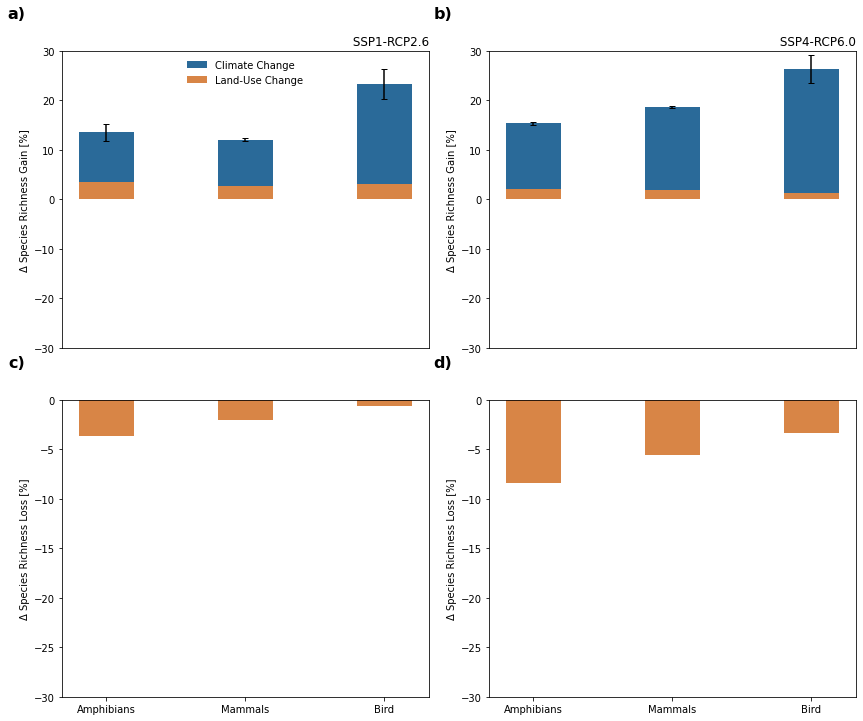

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots

# Set common parameters
bar_width = 0.4
x_positions = np.arange(len(taxas))
min_threshold = 1e-6
y_range_gain = [-30, 30]
y_range_loss = [-30, 0]
subplot_labels = ['a)', 'b)','c)','d)']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
taxa_labels = ["Amphibians","Mammals","Bird"] 

# Plot for gain
for j, scenario in enumerate(scenarios):
    ax_gain = axes[0, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change>0)

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change>0)

        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()


        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change>0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)
        
        ax_gain.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax_gain.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax_gain.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')
    
    ax_gain.set_ylim(y_range_gain)
    ax_gain.set_xticks([])
    ax_gain.set_xticklabels([])
    ax_gain.text(-0.1, 1.15, subplot_labels[j], transform=ax_gain.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    ax_gain.set_ylabel('Δ Species Richness Gain [%]')
    ax_gain.set_title(f' {scenario_indices[scenario]}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax_gain.legend(frameon=False, loc='upper center')



# Plot for loss
for j, scenario in enumerate(scenarios):
    ax_loss = axes[1, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]
        
      #  newvalue_future = xr.where(newvalue_future, cell_area, 0) 
        
                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change<0)
       # rel_diff_newvalue_mean = xr.where(climate_change, cell_area, 0).sum().item() 
       # rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change<0)

        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()


        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change<0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)
        
        ax_loss.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax_loss.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax_loss.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')
    ax_loss.set_ylim(y_range_loss)
    ax_loss.set_xticks(x_positions)
    ax_loss.set_xticklabels(taxa_labels)
    ax_loss.set_xticks(x_positions)

    ax_loss.set_ylabel('Δ Species Richness Loss [%]')
    ax_loss.text(-0.1, 1.15, subplot_labels[j+2], transform=ax_loss.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplots_adjust(hspace=0.3)  # Adjust horizontal space if needed
plt.tight_layout()
plt.show()

/scratch/local/7206824/ipykernel_117494/1620116442.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_loss.set_xticklabels(taxa_labels)
/scratch/local/7206824/ipykernel_117494/1620116442.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_loss.set_xticklabels(taxa_labels)


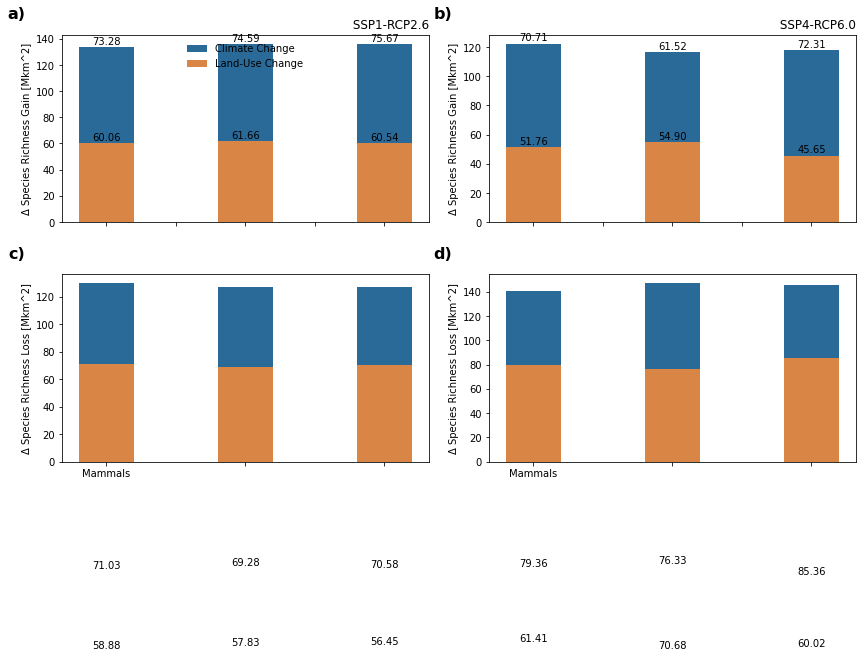

In [285]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots

# Set common parameters
bar_width = 0.4
x_positions = np.arange(len(taxas))
min_threshold = 1e-6
y_range_gain = [0, 30]
y_range_loss = [-30, 0]
subplot_labels = ['a)', 'b)','c)','d)']

scenario_indices={"rcp26": 'SSP1-RCP2.6', "rcp60": 'SSP4-RCP6.0'}
taxas_labels=  ["Mammals","Birds","Amphibians"] 
taxas=  ["Mammals","Bird","Amphibians"] 

# Plot for gain
for j, scenario in enumerate(scenarios):
    ax_gain = axes[0, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where(sumbin_future == sumbin_hist, cell_area, 0).sum().item()
        bar_cc = ax_gain.bar(x_shift, gain_area_cc, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=gain_area_luc)
        bar_luc = ax_gain.bar(x_shift, gain_area_luc, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)

        # Adding numbers to the bars
        ax_gain.text(x_shift, gain_area_luc + gain_area_cc + 0.5, f'{gain_area_cc:.2f}', ha='center', va='bottom')
        if gain_area_luc > 0:  # Only show if there is a visible bar segment for land-use change
            ax_gain.text(x_shift, gain_area_luc + 0.5, f'{gain_area_luc:.2f}', ha='center', va='bottom')

    

    ax_gain.set_xticklabels([])
    ax_gain.text(-0.1, 1.15, subplot_labels[j], transform=ax_gain.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    ax_gain.set_ylabel('Δ Species Richness Gain [Mkm^2]')
    ax_gain.set_title(f' {scenario_indices[scenario]}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax_gain.legend(frameon=False, loc='upper center')



# Plot for loss
for j, scenario in enumerate(scenarios):
    ax_loss = axes[1, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)

        

        # Assuming 'cell_area' is a DataArray with dimensions 'lat' and 'lon'
        # and a binary mask 'land_mask' where land=1 and ocean=0

        # Apply land mask to exclude oceanic areas from the analysis
        cell_area_land_only = cell_area.where(land_mask == 1)

        # Recalculate gain and loss areas using the masked area
        gain_area_cc = xr.where((newvalue_future > newvalue_hist) & (land_mask == 1), cell_area_land_only, 0).sum().item()
        loss_area_cc = xr.where((newvalue_future < newvalue_hist) & (land_mask == 1), cell_area_land_only, 0).sum().item()
        # Repeat for land-use change calculations

        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        

        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        


        bar_cc = ax_loss.bar(x_shift, loss_area_cc, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=loss_area_luc)
        bar_luc = ax_loss.bar(x_shift, loss_area_luc, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)

        # Adding numbers to the bars
        ax_loss.text(x_shift, -(loss_area_luc + loss_area_cc) - 0.5, f'{loss_area_cc:.2f}', ha='center', va='top')
        if loss_area_luc > 0:  # Only show if there is a visible bar segment for land-use change
            ax_loss.text(x_shift, -loss_area_luc - 0.5, f'{loss_area_luc:.2f}', ha='center', va='top')
    ax_loss.set_xticklabels(taxa_labels)
    ax_loss.set_xticks(x_positions)

    ax_loss.set_ylabel('Δ Species Richness Loss [Mkm^2]')
    ax_loss.text(-0.1, 1.15, subplot_labels[j+2], transform=ax_loss.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplots_adjust(hspace=0.3)  # Adjust horizontal space if needed
plt.tight_layout()
plt.show()

total_area = gain_area_cc + abs(loss_area_cc) + gain_area_luc + abs(loss_area_luc) + no_change_area
no_change_area = xr.where(sumbin_future == sumbin_hist, cell_area, 0).sum().item()




In [193]:
ncfname_ssp126 = "/storage/workspaces/wa_climate/climate_trt/chari/LUH2/remapped_luh2_ssp126.nc"

da_landuse_ssp126 = xr.open_dataset(ncfname_ssp126, decode_times=False)

In [217]:
land_mask=da_landuse_ssp126["primf"].isel(time=0)


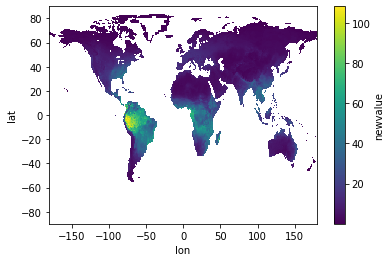

In [184]:
newvalue_hist.plot()

In [169]:
print(gain_area_cc/total_area)
print(gain_area_luc/total_area)

print(loss_area_cc/total_area)
print(loss_area_luc/total_area)

0.09373653243762715
0.08982150459810682
0.11189204721684681
0.11580707505636717


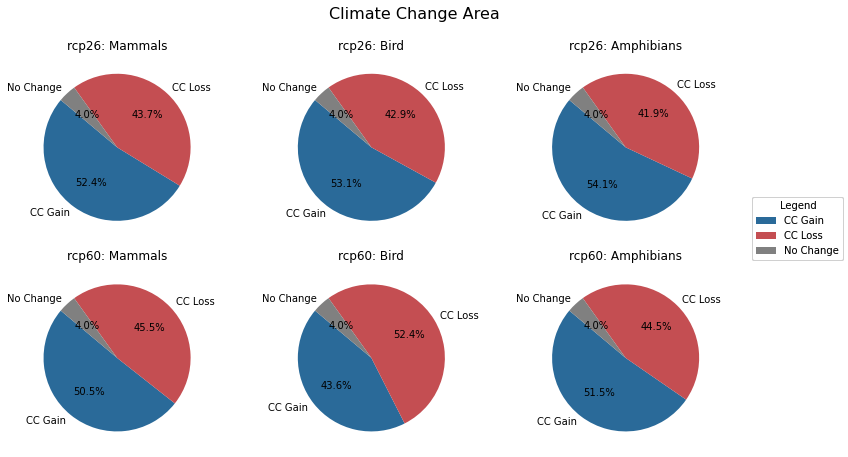

In [283]:
import matplotlib.pyplot as plt


# Example colors and labels for the pie chart segments
colors = ['#2a6a99', '#c44e52', 'grey']  # Adding grey shades for no change
labels = ['CC Gain', 'CC Loss', 'No Change']

# Calculate total area
total_area = gain_area_cc + abs(loss_area_cc)  + no_change_area

taxas=["Mammals","Bird","Amphibians"]
scenarios=["rcp26","rcp60"]
num_scenarios = len(scenarios)
num_taxas = len(taxas)
fig, axes = plt.subplots(num_scenarios, num_taxas, figsize=(12, 6))  # Adjust figsize as needed


for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):

        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)

        
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).where(land_mask>=0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).where(land_mask>=0).sum().item()
        
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).where(land_mask>=0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).where(land_mask>=0).sum().item() 
        
        
        portions = [gain_area_cc,
                    loss_area_cc ,
                    no_change_area  ]
        
        # Determine the correct axis
        if num_scenarios > 1 or num_taxas > 1:
            ax = axes[j, i]
        else:
            ax = axes
        
            # Adjust plotting as per the updated axes and figure setup
        ax.pie(portions, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'{scenario}: {taxa}')

# Place the legend outside of the subplots
        fig.legend(labels, loc='center right', title='Legend')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right side of the layout to make room for the legend
plt.suptitle('Climate Change Area', fontsize=16,y=1.05)
plt.show()

In [264]:
loss_area_cc

60.01793942301978

In [278]:
gain_area_luc=xr.where(luc_fut < luc_hist, cell_area,0).where(land_mask>=0).sum().item() 
gain_area_luc

85.35791906958255

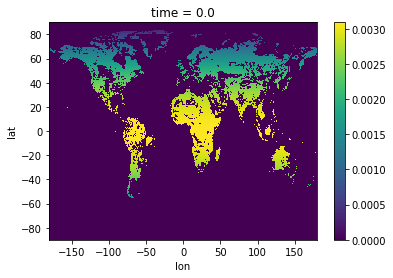

In [282]:
gain_area_luc = xr.where(luc_fut < luc_hist, cell_area,0)
gain_area_luc.plot()

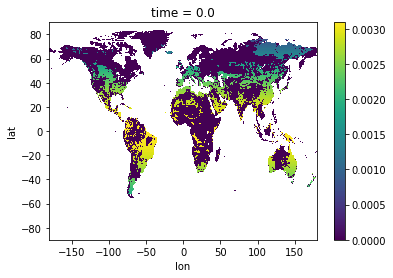

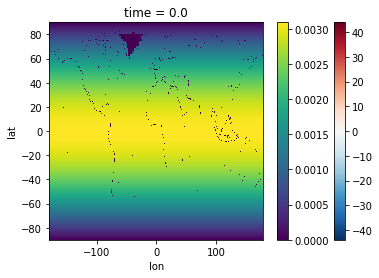

In [265]:
luc_fut = sumbin_future - newvalue_future
luc_hist = sumbin_hist- newvalue_hist

diff=luc_fut-luc_hist
diff.plot()
land= xr.where(diff,cell_area,0).plot()

In [268]:
cc = newvalue_future - newvalue_hist

land= xr.where(cc>0,cell_area,0)

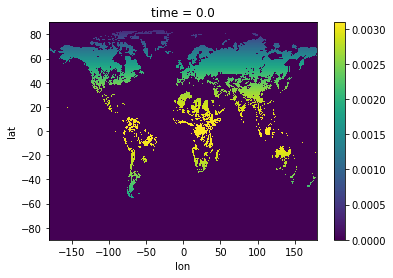

In [269]:
land.plot()

In [ ]:
import matplotlib.pyplot as plt


# Example colors and labels for the pie chart segments
colors = ['#2a6a99', '#c44e52', 'grey']  # Adding grey shades for no change
labels = ['LUC Gain', 'LUC Loss', 'No Change']

# Calculate total area
total_area = gain_area_cc + abs(loss_area_cc)  + no_change_area

taxas=["Mammals","Bird","Amphibians"]
scenarios=["rcp26","rcp60"]
num_scenarios = len(scenarios)
num_taxas = len(taxas)
fig, axes = plt.subplots(num_scenarios, num_taxas, figsize=(12, 6))  # Adjust figsize as needed


for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):

        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa].where(land_mask>=0)
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa].where(land_mask>=0)
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa].where(land_mask>=0)
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa].where(land_mask>=0)
        
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).sum().item()
        
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        
        
        portions = [gain_area_luc,
                    loss_area_luc ,
                    no_change_area  ]
        
        # Determine the correct axis
        if num_scenarios > 1 or num_taxas > 1:
            ax = axes[j, i]
        else:
            ax = axes
        
            # Adjust plotting as per the updated axes and figure setup
        ax.pie(portions, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'{scenario}: {taxa}')

# Place the legend outside of the subplots
        fig.legend(labels, loc='center right', title='Legend')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right side of the layout to make room for the legend
plt.suptitle('Land Use Change Area', fontsize=16,y=1.05)
plt.show()

In [215]:
land_mask

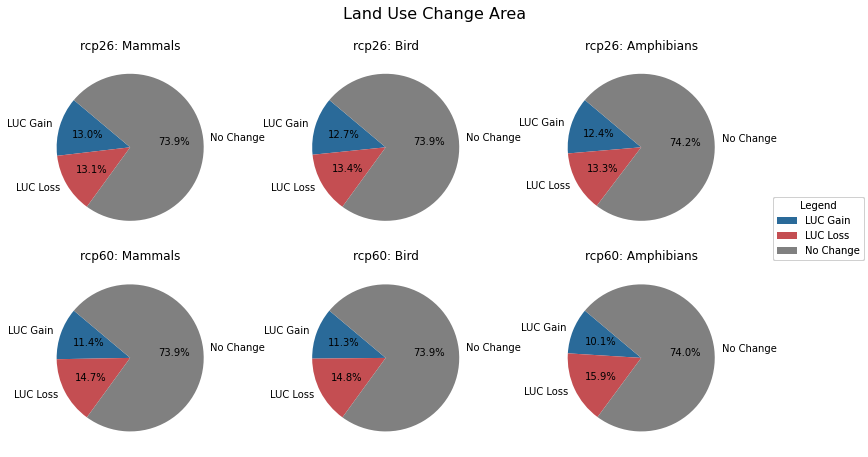

In [213]:
import matplotlib.pyplot as plt


# Example colors and labels for the pie chart segments
colors = ['#2a6a99', '#c44e52', 'grey']  # Adding grey shades for no change
labels = ['LUC Gain', 'LUC Loss', 'No Change']

# Calculate total area
total_area = gain_area_cc + abs(loss_area_cc)  + no_change_area

taxas=["Mammals","Bird","Amphibians"]
scenarios=["rcp26","rcp60"]
num_scenarios = len(scenarios)
num_taxas = len(taxas)
fig, axes = plt.subplots(num_scenarios, num_taxas, figsize=(12, 6))  # Adjust figsize as needed


for j, scenario in enumerate(scenarios):
    for i, taxa in enumerate(taxas):

        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]
        
        
        EARTH_RADIUS = 6371000  # Earth's radius in meters
        # Assuming 'newvalue_future' and others are xarray DataArrays with 'lat' and 'lon' dimensions
        LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))
        LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))
        cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))/ 1e12

        
        gain_area_cc = xr.where(newvalue_future > newvalue_hist, cell_area, 0).sum().item()  # Convert to km²

           
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        
        gain_area_luc = xr.where(luc_fut > luc_hist, cell_area,0).sum().item()
        no_change_area = xr.where((sumbin_future-newvalue_future) == (sumbin_hist-newvalue_hist), cell_area, 0).sum().item()
        
        luc_fut = sumbin_future - newvalue_future
        luc_hist = sumbin_hist- newvalue_hist
        loss_area_cc = xr.where(newvalue_future < newvalue_hist, cell_area, 0).sum().item() # Convert to km²
        loss_area_luc = xr.where(luc_fut < luc_hist, cell_area,0).sum().item() 
        
        
        portions = [gain_area_luc,
                    loss_area_luc ,
                    no_change_area  ]
        
        # Determine the correct axis
        if num_scenarios > 1 or num_taxas > 1:
            ax = axes[j, i]
        else:
            ax = axes
        
            # Adjust plotting as per the updated axes and figure setup
        ax.pie(portions, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'{scenario}: {taxa}')

# Place the legend outside of the subplots
        fig.legend(labels, loc='center right', title='Legend')

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the right side of the layout to make room for the legend
plt.suptitle('Land Use Change Area', fontsize=16,y=1.05)
plt.show()

In [130]:
labels

['CC Gain', 'CC LossNo Change']

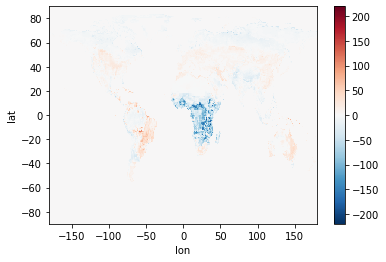

In [107]:
diff =luc_fut-luc_hist
diff.plot()

Scenario: rcp26, Taxa: Mammals,  Gain Area CC: 59.65 km²
Scenario: rcp26, Taxa: Mammals,  Gain Area LUC: 67.41 km²
Scenario: rcp26, Taxa: Bird,  Gain Area CC: 62.66 km²
Scenario: rcp26, Taxa: Bird,  Gain Area LUC: 72.87 km²
Scenario: rcp26, Taxa: Amphibians,  Gain Area CC: 65.35 km²
Scenario: rcp26, Taxa: Amphibians,  Gain Area LUC: 67.24 km²
Scenario: rcp60, Taxa: Mammals,  Gain Area CC: 58.48 km²
Scenario: rcp60, Taxa: Mammals,  Gain Area LUC: 54.01 km²
Scenario: rcp60, Taxa: Bird,  Gain Area CC: 52.28 km²
Scenario: rcp60, Taxa: Bird,  Gain Area LUC: 50.21 km²
Scenario: rcp60, Taxa: Amphibians,  Gain Area CC: 58.80 km²
Scenario: rcp60, Taxa: Amphibians,  Gain Area LUC: 54.15 km²
Scenario: rcp26, Taxa: Mammals,  Loss Area CC: 69.35 km²
Scenario: rcp26, Taxa: Mammals,  Loss Area LUC: 60.97 km²
Scenario: rcp26, Taxa: Bird,  Loss Area CC: 66.34 km²
Scenario: rcp26, Taxa: Bird,  Loss Area LUC: 55.94 km²
Scenario: rcp26, Taxa: Amphibians,  Loss Area CC: 62.93 km²
Scenario: rcp26, Taxa: Amp

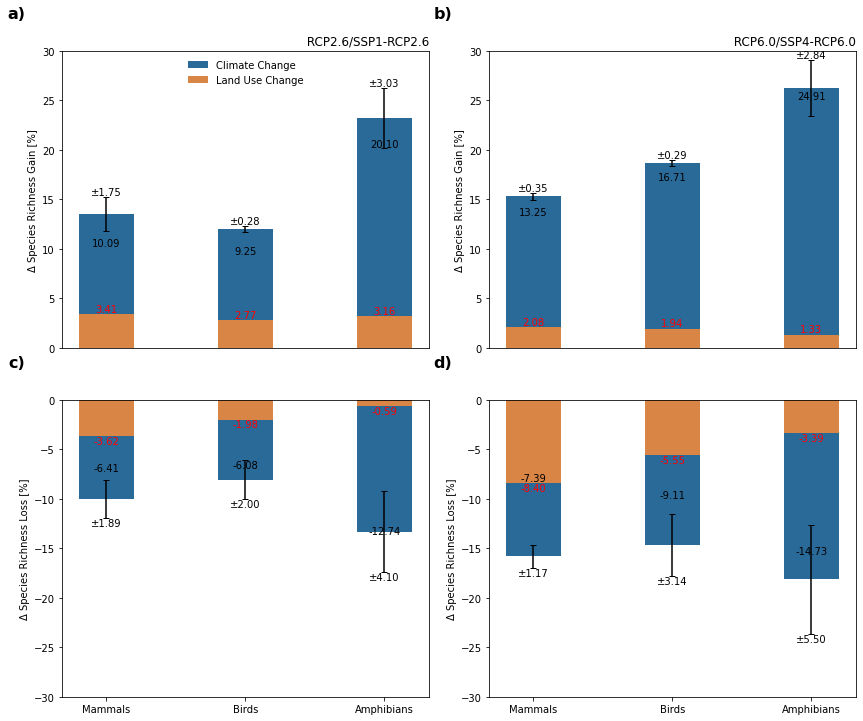

In [162]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid of subplots

# Set common parameters
bar_width = 0.4
x_positions = np.arange(len(taxas))
min_threshold = 1e-6
y_range_gain = [0, 30]
y_range_loss = [-30, 0]
subplot_labels = ['a)', 'b)','c)','d)']

scenario_indices={"rcp26": 'RCP2.6/SSP1-RCP2.6', "rcp60": 'RCP6.0/SSP4-RCP6.0'}
taxa_labels = ["Mammals", "Birds", "Amphibians"] 

# Plot for gain
for j, scenario in enumerate(scenarios):
    ax_gain = axes[0, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change>0)
        
        gain_area_cc = xr.where(climate_change > 0, cell_area, 0).sum().item()/ 1e12

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change>0)

        gain_area_luc = xr.where(climate_land_change > 0, cell_area, 0).sum().item()/ 1e12
        
        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()
        
        print(f"Scenario: {scenario}, Taxa: {taxa},  Gain Area CC: {gain_area_cc:.2f} km²")    
        print(f"Scenario: {scenario}, Taxa: {taxa},  Gain Area LUC: {gain_area_luc:.2f} km²") 

        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change>0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)
        
        ax_gain.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax_gain.bar(x_shift, rel_diff_sumbin, bar_width, label='Land Use Change' if i == 0 else "", color=color_land_use_change)
        ax_gain.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')
        
        ax_gain.text(x_shift, rel_diff_newvalue_mean, f'{rel_diff_newvalue_mean:.2f}', ha='center', va='bottom')
        ax_gain.text(x_shift, rel_diff_sumbin, f'{rel_diff_sumbin:.2f}', ha='center', va='bottom',color='red')
        ax_gain.text(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean + std_dev_newvalue_region, f'±{std_dev_newvalue_region:.2f}', ha='center', va='bottom')

    
    ax_gain.set_ylim(y_range_gain)
    ax_gain.set_xticks([])
    ax_gain.set_xticklabels([])
    ax_gain.text(-0.1, 1.15, subplot_labels[j], transform=ax_gain.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
    ax_gain.set_ylabel('Δ Species Richness Gain [%]')
    ax_gain.set_title(f' {scenario_indices[scenario]}', loc='right')
    if j == 0:  # Add legend only to the first subplot
        ax_gain.legend(frameon=False, loc='upper center')


EARTH_RADIUS = 6371000  # Earth's radius in meters
LAT_DIFF = np.radians(np.abs(newvalue_future.lat[1] - newvalue_future.lat[0]))  # Latitudinal difference in radians
LON_DIFF = np.radians(np.abs(newvalue_future.lon[1] - newvalue_future.lon[0]))  # Longitudinal difference in radians

# Calculate grid cell area
cell_area = (EARTH_RADIUS**2) * LAT_DIFF * LON_DIFF * np.cos(np.radians(newvalue_future.lat))

# Plot for loss
for j, scenario in enumerate(scenarios):
    ax_loss = axes[1, j]
    std_dev_newvalue = []
    for i, taxa in enumerate(taxas):
        x_shift = x_positions[i]
        
        
        newvalue_future = mean_over_all_sdms_gcms_fut[scenario][taxa]
        newvalue_hist = mean_over_all_sdms_gcms_hist[scenario][taxa]
        sumbin_future = mean_over_all_sdms_gcms_sumbin_fut[scenario][taxa]
        sumbin_hist = mean_over_all_sdms_gcms_sumbin_hist[scenario][taxa]

                # Calculate the relative difference safely
        min_threshold = 1e-6  # Adjust this threshold based on your data

        non_zero_mask = sumbin_future != 0

        newvalue_hist_filtered = newvalue_hist.where(newvalue_hist > min_threshold, np.nan)
        difference = (newvalue_future - newvalue_hist_filtered) / newvalue_hist_filtered * 100
        climate_change = difference.where((difference >= -100) & (difference <= 100))
        
        

        climate_change = climate_change.where(non_zero_mask, np.nan)
        climate_change = climate_change.where(climate_change<0)
        
        loss_area_cc = xr.where(climate_change < 0, cell_area, 0).sum().item()/ 1e12
        

        rel_diff_newvalue_mean = climate_change.mean()

        
        sumbin_hist_filtered = sumbin_hist.where(sumbin_hist > min_threshold, np.nan)
        difference = (sumbin_future - sumbin_hist_filtered) / sumbin_hist_filtered * 100
        climate_land_change = difference.where((difference >= -100) & (difference <= 100))

        climate_land_change = climate_land_change.where(non_zero_mask, np.nan)
        climate_land_change = climate_land_change.where(climate_land_change<0)
        
        loss_area_luc = xr.where(climate_land_change < 0, cell_area, 0).sum().item()/ 1e12

        luc = climate_land_change - climate_change
        rel_diff_sumbin = luc.mean()

        print(f"Scenario: {scenario}, Taxa: {taxa},  Loss Area CC: {loss_area_cc:.2f} km²")    
        print(f"Scenario: {scenario}, Taxa: {taxa},  Loss Area LUC: {loss_area_luc:.2f} km²")    

        means_over_sdms = []
        for sdm in sdms:
            means_for_std = []
            for gcm in gcms:
                # Ensure that data for the specific 'taxa' is selected
                sep_future = mean_newvalue_fut[scenario][taxa][sdm][gcm] # Add [taxa] here
                sep_hist = mean_newvalue_hist[scenario][taxa][sdm][gcm]  # Add [taxa] here
                sep_hist_filtered = sep_hist.where(sep_hist > min_threshold, np.nan)
                difference = xr.where(sep_hist != 0, (sep_future - sep_hist) / sep_hist_filtered * 100, 0)
                relative_change = difference.where((difference >= -100) & (difference <= 100))
                relative_change = relative_change.where(non_zero_mask, np.nan).where(relative_change<0)

                mean_relative_change = np.nanmean(relative_change.values)
                means_for_std.append(mean_relative_change)

            mean_over_gcms = np.nanmean(means_for_std)
            means_over_sdms.append(mean_over_gcms)
        

        std_dev_newvalue_region = np.nanstd(means_over_sdms)
        
        ax_loss.bar(x_shift, rel_diff_newvalue_mean, bar_width, label='Climate Change' if i == 0 else "", color=color_change, bottom=rel_diff_sumbin)
        ax_loss.bar(x_shift, rel_diff_sumbin, bar_width, label='Land-Use Change' if i == 0 else "", color=color_land_use_change)
        ax_loss.errorbar(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean, yerr=std_dev_newvalue_region, fmt='none', capsize=3, color='black')
        
        ax_loss.text(x_shift, rel_diff_newvalue_mean, f'{rel_diff_newvalue_mean:.2f}', ha='center', va='top')
        ax_loss.text(x_shift, rel_diff_sumbin, f'{rel_diff_sumbin:.2f}', ha='center', va='top', color='red')
        ax_loss.text(x_shift, rel_diff_sumbin + rel_diff_newvalue_mean - std_dev_newvalue_region, f'±{std_dev_newvalue_region:.2f}', ha='center', va='top')
        

    ax_loss.set_ylim(y_range_loss)
    ax_loss.set_xticks(x_positions)
    ax_loss.set_xticklabels(taxa_labels)
    ax_loss.set_xticks(x_positions)

    ax_loss.set_ylabel('Δ Species Richness Loss [%]')
    ax_loss.text(-0.1, 1.15, subplot_labels[j+2], transform=ax_loss.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

plt.subplots_adjust(hspace=0.3)  # Adjust horizontal space if needed
plt.tight_layout()
plt.show()